In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
df = pd.read_csv('data/combined_tweets.csv')
users = df["user"].unique()

In [3]:
def get_engagements(df):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    viz_retweets = viz_df["retweets"].sum()
    viz_replies = viz_df["replies"].sum()
    viz_likes = viz_df["likes"].sum()
    viz_quotes = viz_df["quotes"].sum()
    
    no_viz_retweets = no_viz_df["retweets"].sum()
    no_viz_replies = no_viz_df["replies"].sum()
    no_viz_likes = no_viz_df["likes"].sum()
    no_viz_quotes = no_viz_df["quotes"].sum()
    
    viz_engagements = viz_retweets + viz_replies + viz_likes + viz_quotes
    no_viz_engagements = no_viz_retweets + no_viz_replies + no_viz_likes + no_viz_quotes
    
    total_engagements = viz_engagements + no_viz_engagements
    
    non_viz_tweets = len(no_viz_df)
    viz_tweets = len(viz_df)
    
    print("viz tweets:", viz_tweets)
    print("non viz tweets:", non_viz_tweets)
    
#     print("visualization tweet engagements: ", viz_engagements)
#     print("no visualization tweet engagements: ", no_viz_engagements)
#     print("total engagements: ", total_engagements)
    
    return viz_engagements, no_viz_engagements 

In [4]:
def show_pie(disp_df, authorname):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'With Viz', 'Without Viz'
    viz_engagements, non_viz_engagements = get_engagements(disp_df)
    sizes = []
    sizes.append(viz_engagements)
    sizes.append(non_viz_engagements)
    
    #generate legend 
#     plt.legend(labels,loc=3)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(authorname)

    plt.show()

In [5]:
def f(authors):
    disp_df = df.loc[df["user"] == authors]
    return show_pie(disp_df, authors)

interact(f, authors=users);

interactive(children=(Dropdown(description='authors', options=('abmakulec', 'aetiology', 'alicesim', 'AmeshAA'…

In [8]:
df.columns

Index(['tweet_id', 'user', 'text', 'date', 'retweets', 'replies', 'likes',
       'quotes', 'has_viz'],
      dtype='object')

In [9]:
test_df = df.loc[df['user'] == "CDCGov"]
test_df.head()

,tweet_id,user,text,date,retweets,replies,likes,quotes,has_viz
4348,1375898173978382337,CDCGov,You may be considered a close contact even if ...,03/27/2021 19:51:02,112,69,232,11,True
4349,1375890228574044161,CDCGov,"Carol Wong, director of Chinatown Learning Cen...",03/27/2021 19:19:27,49,43,204,7,True
4350,1375866473667776513,CDCGov,#WearAMask when you are taking care of someone...,03/27/2021 17:45:04,215,83,487,14,True
4351,1375550876874514433,CDCGov,"Gathering outdoors is safer, but if you gather...",03/26/2021 20:51:00,284,136,502,23,True
4352,1375533018287325184,CDCGov,Johnson &amp; Johnson's Janssen #COVID19 vacci...,03/26/2021 19:40:02,102,55,272,8,True


In [14]:
test_df["date"] = test_df["date"].astype("datetime64")
test_df = test_df.set_index("date")

KeyError: 'date'

In [15]:
test_df

,tweet_id,user,text,retweets,replies,likes,quotes,has_viz
date,,,,,,,,
2021-03-27 19:51:02,1375898173978382337,CDCGov,You may be considered a close contact even if ...,112,69,232,11,True
2021-03-27 19:19:27,1375890228574044161,CDCGov,"Carol Wong, director of Chinatown Learning Cen...",49,43,204,7,True
2021-03-27 17:45:04,1375866473667776513,CDCGov,#WearAMask when you are taking care of someone...,215,83,487,14,True
2021-03-26 20:51:00,1375550876874514433,CDCGov,"Gathering outdoors is safer, but if you gather...",284,136,502,23,True
2021-03-26 19:40:02,1375533018287325184,CDCGov,Johnson &amp; Johnson's Janssen #COVID19 vacci...,102,55,272,8,True
...,...,...,...,...,...,...,...,...
2022-04-13 20:30:03,1514340157641707520,CDCGov,.@ProjectRefocus_ works with communities to mo...,24,37,67,5,True
2022-04-13 19:28:01,1514324546484150277,CDCGov,#Parents and Caregivers: Your children ages 5+...,58,101,104,12,True
2022-04-12 22:52:03,1514013506047299594,CDCGov,RT @CDCEnvironment: A study by CDC and #ATSDR ...,15,0,0,0,False


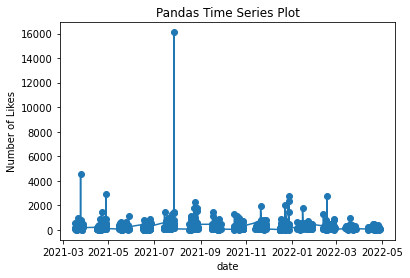

In [16]:
# Plot

plt.plot(test_df["likes"], marker='o')

# Labelling 

plt.xlabel("date")
plt.ylabel("Number of Likes")
plt.title("Pandas Time Series Plot")

# Display

plt.show()

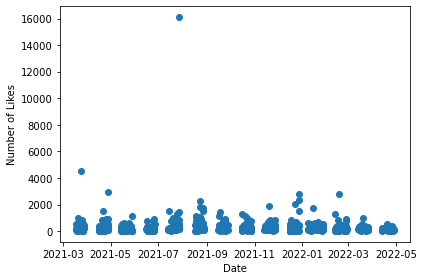

In [17]:
# Plot scatter

plt.scatter(test_df.index, test_df["likes"])

# Labelling 

plt.xlabel("Date")
plt.ylabel("Number of Likes")

# Auto space

plt.tight_layout()

# Display


plt.show()